In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG_F3_MA #my means per DRG file
import scikit_posthocs as sp

In [10]:
name = "D7_CCI_F3_"
#open json file with data lists from all images
with open ("F3_CCI_d7.json") as f:
    results_d7cci = json.load (f)

In [11]:
#implement / access file for mean calculations --> groups of IL and CL side
d7cci_il = analysis_perDRG_F3.GroupData (results_d7cci, "IL" , anz_rats = 6)
d7cci_cl = analysis_perDRG_F3.GroupData (results_d7cci, "CL" , anz_rats = 6)

In [22]:
def statistic (groupdata_il , groupdata_cl):
    #test for normal distribution 
    statistic, p_value_il = stats.shapiro(groupdata_il)
    statistic, p_value_cl = stats.shapiro(groupdata_cl)
    
    if (p_value_il < 0.05) or (p_value_cl < 0.05):
        #no normal distribution
        #--> Mann Whitney U test  
        statistic, p_value = stats.mannwhitneyu(groupdata_il, groupdata_cl, alternative='two-sided') 
        print('Mann Whitney U: p-value='+"{:.5f}".format(p_value))
    else: #normal distribution --> test variance
        statistic, p_value = stats.bartlett (groupdata_il, groupdata_cl)
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
            print('Welch-test')
        else: 
            equal_variance = True
            print('t-test')
        # perform t-test
        statistic, p_value = stats.ttest_ind(groupdata_il, groupdata_cl, equal_var=equal_variance, nan_policy='omit')
        print('p-value='+"{:.5f}".format(p_value))

In [6]:
def quickplot (group_il , group_cl , feature):
    group_il_data = getattr (d7cci_il, feature)
    group_cl_data = getattr (d7cci_cl, feature)
    
    statistic(group_il_data, group_cl_data)
    
    plt.figure (figsize = (4,6))
    sns.boxplot(data=[group_il_data, group_cl_data])
    sns.stripplot(data=[group_il_data, group_cl_data], jitter=0.2)
    ax = plt.gca()
    ax.set_xticklabels([group_il.name, group_cl.name], fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.show()

Mann Whitney U: p-value=0.00004


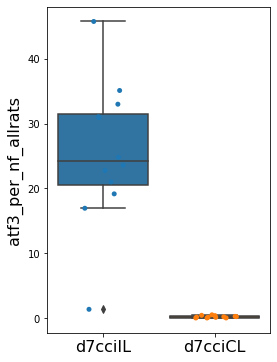

In [7]:
quickplot (d7cci_il , d7cci_cl, "atf3_per_nf_allrats")

Mann Whitney U: p-value=0.00004


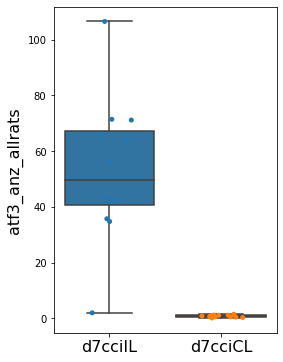

In [8]:
quickplot (d7cci_il , d7cci_cl, "atf3_anz_allrats")

In [36]:
def plot_all(feature_a, feature_b, ylabel):
    group_il_data_a = getattr (d7cci_il, feature_a)
    group_cl_data_a = getattr (d7cci_cl, feature_a)    
    group_il_data_b = getattr (d7cci_il, feature_b)
    group_cl_data_b = getattr (d7cci_cl, feature_b)     
    
    print (statistic (group_il_data_a, group_cl_data_a))
    print (statistic (group_il_data_b, group_cl_data_b))
    print (statistic (group_il_data_a, group_il_data_b))
    
    plt.figure(figsize=(9,9))
    labels=['per NF CL', 'per NF IL', 'per IB4 CL', 'per IB4 IL']

    c='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":3}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 24
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth)
    ax.set_ylim ([-1 , 55.0])
    plt.xticks(fontname="Arial", fontsize=fontsize)
    plt.yticks(fontname="Arial", fontsize=fontsize)


    plt.ylabel(ylabel, fontname="Arial", fontsize=28)

    

    sns.boxplot(data=[group_cl_data_a, group_il_data_a, group_cl_data_b, group_il_data_b], width=0.5, whiskerprops=line_props, boxprops=bbox_props
                ,capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_cl_data_a, group_il_data_a, group_cl_data_b, group_il_data_b], jitter=0.1, dodge=True, size=7, marker='o', palette='tab20')
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=22)
    
    plt.savefig(name+ylabel+'.png', bbox_inches = "tight")
    plt.show()

Mann Whitney U: p-value=0.00004
None
Mann Whitney U: p-value=0.00009
None
Mann Whitney U: p-value=0.00165
None


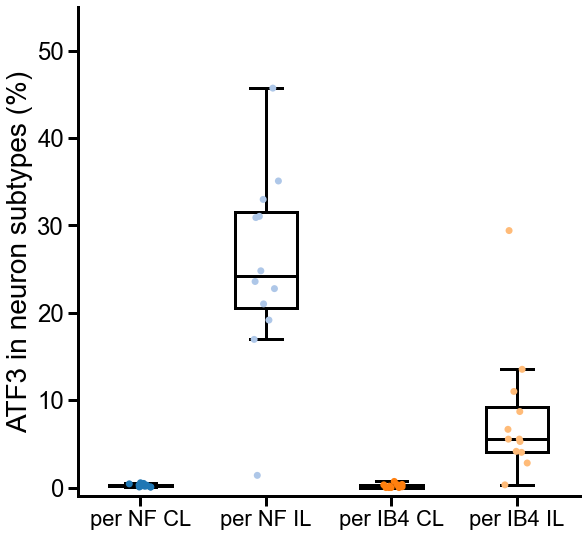

In [37]:
plot_all ("atf3_per_nf_allrats", "atf3_per_ib4_allrats", "ATF3 in neuron subtypes (%)")

In [10]:
def stat_all(feature_a, feature_b, ylabel):
    group_il_data_a = getattr (d7cci_il, feature_a)
    group_cl_data_a = getattr (d7cci_cl, feature_a)    
    group_il_data_b = getattr (d7cci_il, feature_b)
    group_cl_data_b = getattr (d7cci_cl, feature_b)     
    
    print (statistic (group_il_data_a, group_cl_data_a))
    print (statistic (group_il_data_b, group_cl_data_b))
    print (statistic (group_il_data_a, group_il_data_b))

In [11]:
stat_all ("atf3_per_nf_allrats", "atf3_per_ib4_allrats", "ATF3 in neuron subtypes (%)")

Mann Whitney U: p-value=0.00004
None
Mann Whitney U: p-value=0.00009
None
Mann Whitney U: p-value=0.00165
None


In [11]:
print ("mean IL" , np.mean (d7cci_il.atf3_per_nf_allrats))
print ("mean CL" , np.mean (d7cci_cl.atf3_per_nf_allrats))
print ("SD IL" , np.std (d7cci_il.atf3_per_nf_allrats))
print ("SD CL" , np.std (d7cci_cl.atf3_per_nf_allrats))

mean IL 25.455794396467848
mean CL 0.24858057590645807
SD IL 10.576764520365993
SD CL 0.15625120393377773


In [12]:
print ("mean IL" , np.mean (d7cci_il.atf3_per_ib4_allrats))
print ("mean CL" , np.mean (d7cci_cl.atf3_per_ib4_allrats))
print ("SD IL" , np.std (d7cci_il.atf3_per_ib4_allrats))
print ("SD CL" , np.std (d7cci_cl.atf3_per_ib4_allrats))

mean IL 8.082223349011551
mean CL 0.20325806263809368
SD IL 7.283813897585881
SD CL 0.2006769962208686
